## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt 

##Extract information given

In [10]:
import yaml

information = {'events': [], 'benchmarks': []}

with open('../yaml/information.yaml') as f:
    information = yaml.load(f)


##File Read

In [ ]:
filename = '557.xz_r'

if filename not in information['benchmarks']:
  print('Filename does not matches with the benchmarks given!!!')
else:
  input_filename = filename + '.txt'
  output_filename = filename + '.csv'

  data_txt = pd.read_csv('../data/' + input_filename, sep="\t")
  data_txt.head()

,# time counts unit events
0,0.701942274 458020557 cycle...
1,0.701942274 1079480385 instr...
2,0.701942274 286598 branc...
3,0.701942274 9492702 L1-dc...
4,0.701942274 461278 L1-ic...


##Data Preprocessing

In [ ]:
dataset_columns = set()
timewise_data = {}

ignored_time = []   # add time whose data you want to skip

for index, row in data_txt.iterrows():

  if row[0].find('time') != -1:
    continue

  ignore = 0
  for time in ignored_time:
    if time in row[0]:
      ignore = 1
      break

  if ignore:
    continue

  current_time_data = []
  extract = ""

  for i in range(len(row[0])):
    if row[0][i] not in [' ', ',']:
      extract += row[0][i]
    if row[0][i] == ' ' and extract != "":
      current_time_data.append(extract)
      extract = ""

  current_time_data[2] = current_time_data[2].split(':')[0]
  dataset_columns.add(current_time_data[2])
  if not timewise_data.get(current_time_data[0]):
    timewise_data[current_time_data[0]] = []
  timewise_data[current_time_data[0]].append([current_time_data[2], current_time_data[1]])



##Check if the information given matches with the data given

In [ ]:

if set(information['events']) == dataset_columns:
  print("Data given is correct")
else:
  print("Data given is not correct. Columns does not match!!!")
  timewise_data = {}

no


##Dataset Creation

In [11]:


dataset = {}
dataset['time'] = []

for column in dataset_columns:
  dataset[column] = []

cpi_possible = 0
if "instructions" in dataset_columns and "cycles" in dataset_columns:
  dataset['cpi'] = []
  cpi_possible = 1
else:
  print("cpi does not exist")

token = {}    # token for only one time addition of event for a  particular time

for column in dataset_columns:
  token[column] = 1

for key, val in timewise_data.items():

  for column in dataset_columns:
    token[column] = 1

  dataset['time'].append(key)
  instruction = 0
  cycle = 0

  for event in val:

    if event[0] == "instructions":
      instruction = event[1]
    if event[0] == "cycles":
      cycle = event[1]

  for event in val:
      
    if token[event[0]]:
        
      event_count_per_instruction = float(event[1])/float(instruction)
      dataset[event[0]].append(event_count_per_instruction)

    token[event[0]] = 0

  if cpi_possible:

    cpi = float(cycle)/float(instruction)
    dataset["cpi"].append(cpi)

dataset = pd.DataFrame.from_dict(dataset)

# removing outliers
dataset = dataset[~(dataset['cpi'] > 2)]

dataset.to_csv("../data/" + output_filename)

dataset.head()

##Data Visualization

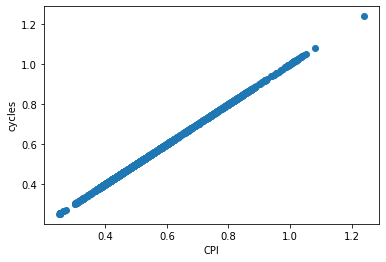

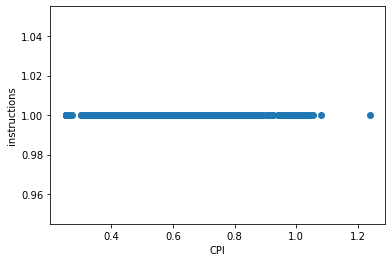

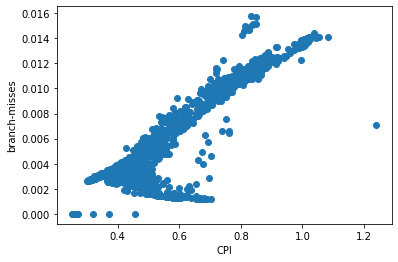

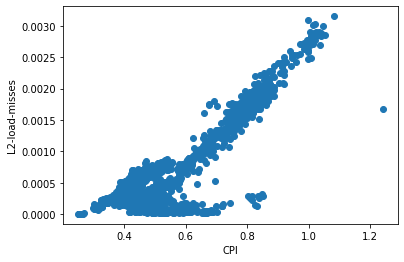

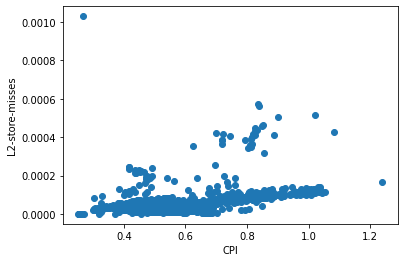

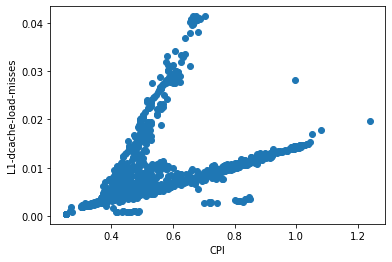

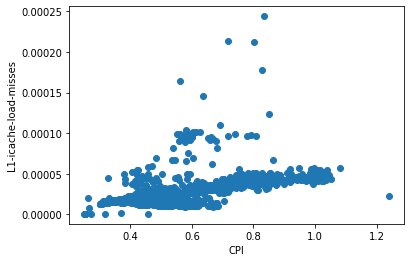

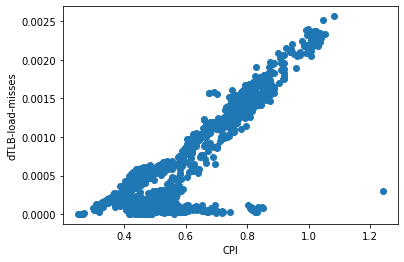

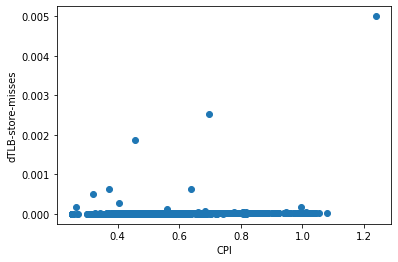

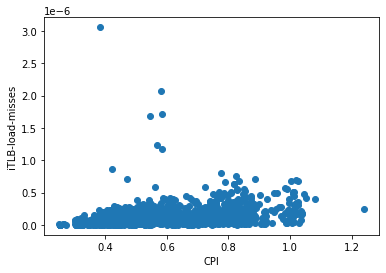

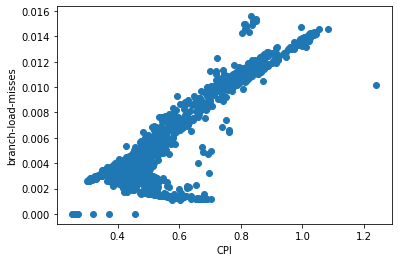

In [ ]:

for event in information['events']:
  plt.scatter(dataset['cpi'], dataset[event])
  plt.xlabel('CPI')
  plt.ylabel(event)
  plt.show()
